In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from featurewiz import FeatureWiz

Imported lazytransform v1.9. 

Imported featurewiz 0.5.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0. imbalanced=False,
        		ae_options={})
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [8]:
df = pd.read_csv('/Users/salma/Downloads/combined_data_subset.csv', index_col=0)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Multi_Classification problem 
    Loaded train data. Shape = (314, 6255)
    Some column names had special characters which were removed...
    Single_Label Multi_Classification problem 
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  #####

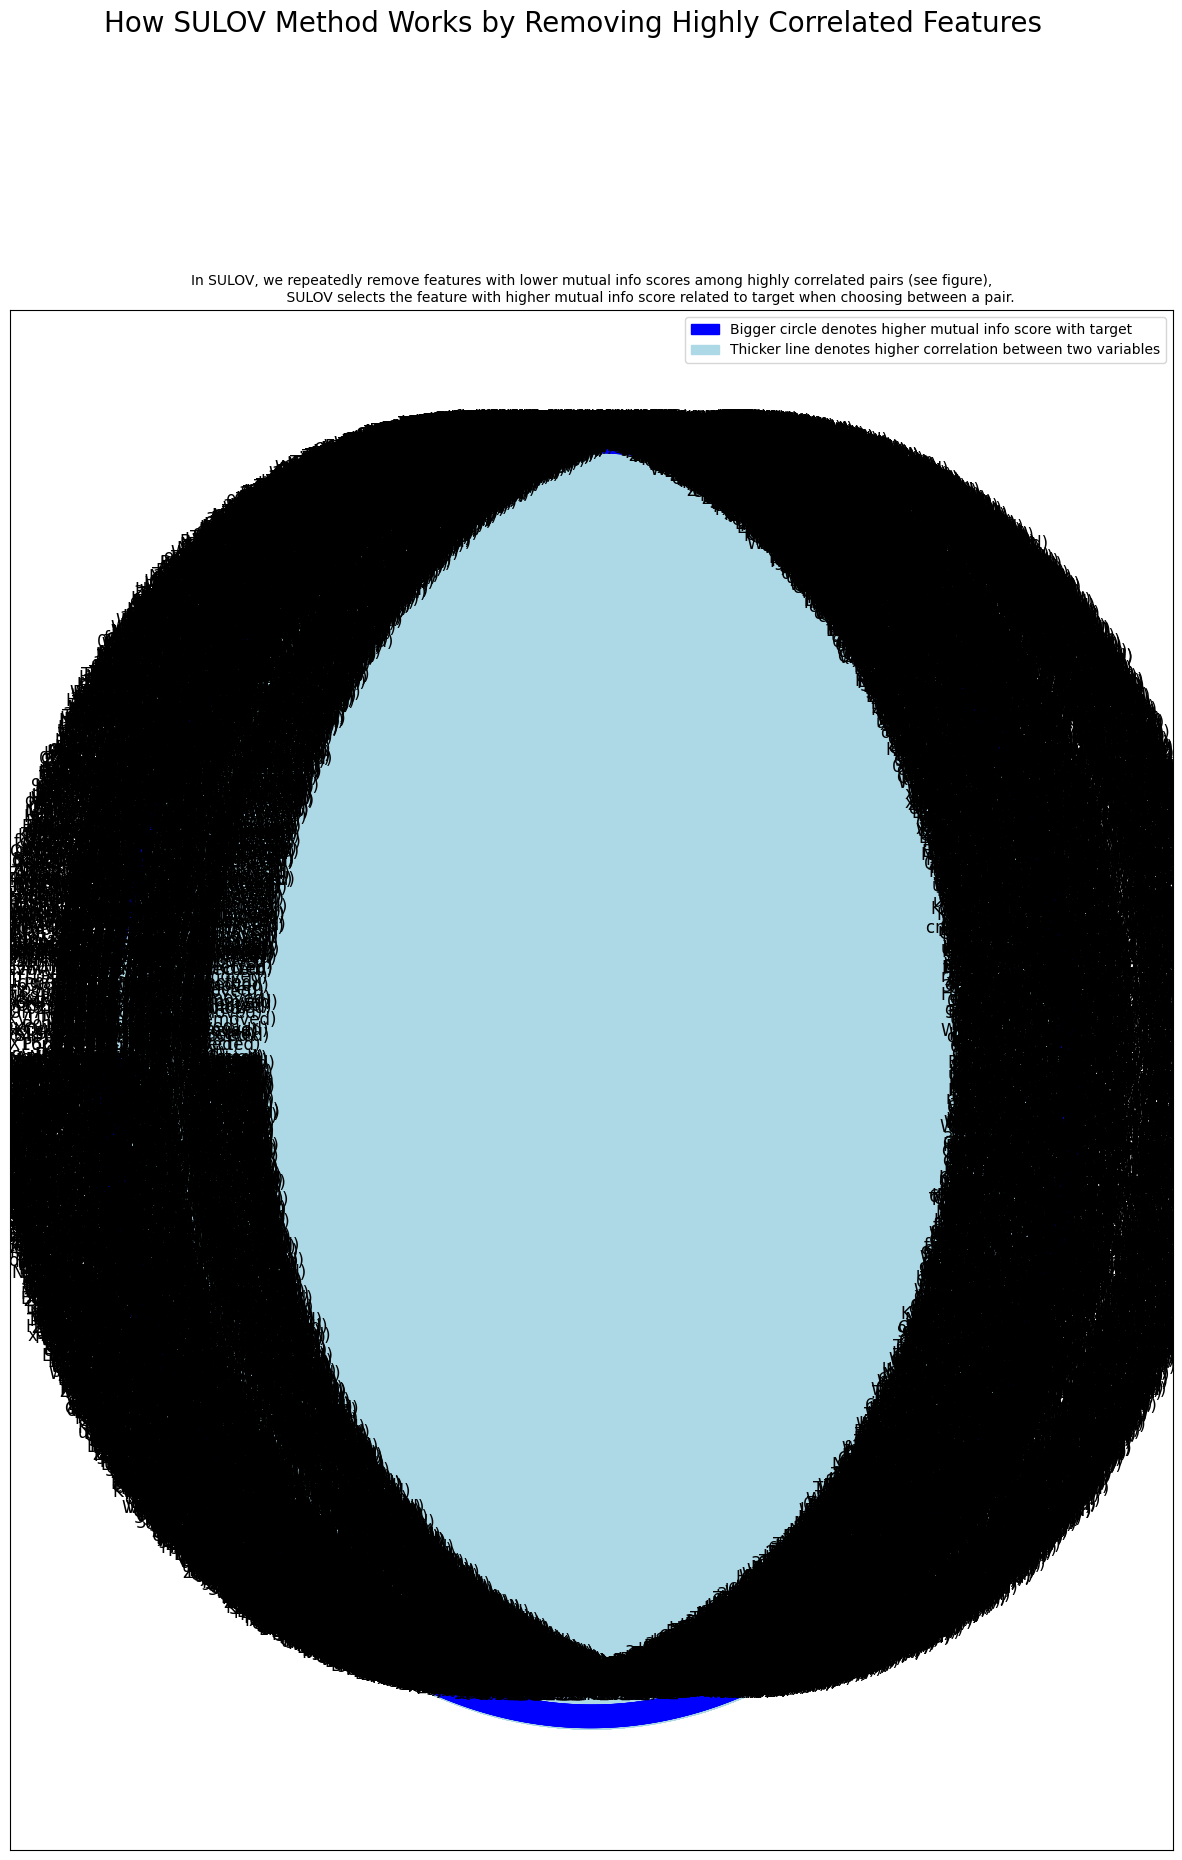

Time taken for SULOV method = 593 seconds
    Adding 0 categorical variables to reduced numeric variables  of 1262
Finally 1262 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 252 features per iteration...
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 0 seconds
            Time taken for regular XGBoost feature selection = 0 seconds
            Time taken for regular XGBoost feature selection = 0 seconds
            Time taken for regular XGBoost feature selection = 0 seconds
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['P24592', 'xX16r_gMAfelqRrp0

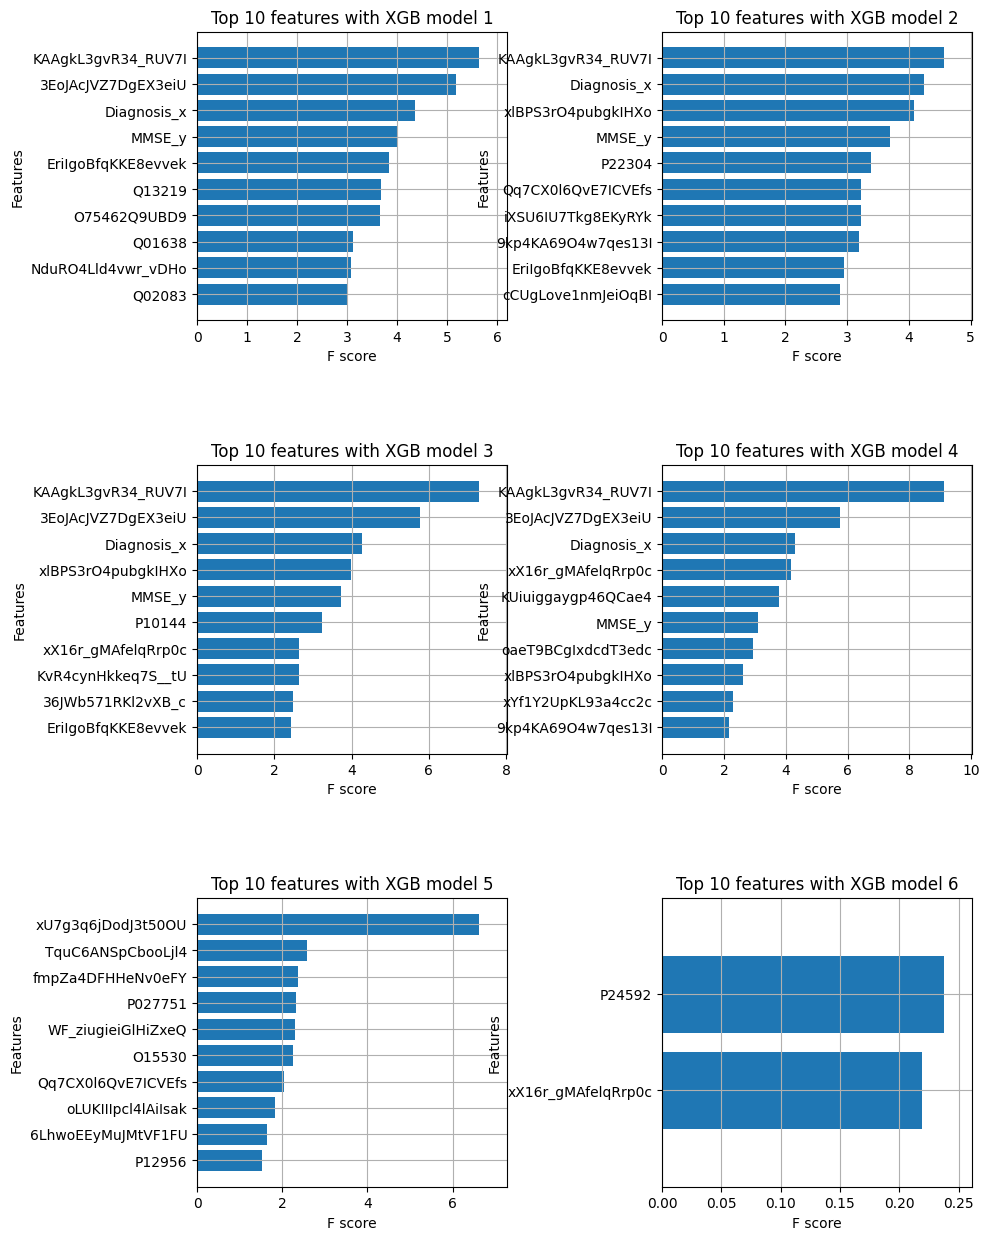

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 713 important features. Too many to print...
Total Time taken for featurewiz selection = 595 seconds
Output contains a list of 713 important features and a train dataframe


In [9]:
import featurewiz as fwiz
outputs = fwiz.featurewiz(dataname=df, target="Diagnosis", corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)

In [10]:
#get list of selected features
selected_data = outputs[1]

In [16]:
df = selected_data
df = df.drop(['Diagnosis_x'], axis=1)

In [17]:
# Initial correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix['Diagnosis'].sort_values(ascending=False))

#keep only the features with absolute correlation greater than 0.2
df = df[correlation_matrix['Diagnosis'][abs(correlation_matrix['Diagnosis']) > 0.3].index]
df

Diagnosis             1.000000
MMSE_y                0.470144
Bioe2e40i6vCeFKBFQ    0.367325
HTx0glHe6CseqQuKW0    0.361646
fj3VaHdbTqbufvj1KE    0.359098
                        ...   
NhdSLgjq4cjjO7q6pY   -0.283413
c6BohJPqeHupOKKjCk   -0.289614
oop4pqiNEK0ojYhSXg   -0.302724
NuSUe8JTu9QpP8mqKo   -0.321786
oLUKIIIpcl4lAiIsak   -0.340136
Name: Diagnosis, Length: 713, dtype: float64


,MMSE_y,KAAgkL3gvR34_RUV7I,9kp4KA69O4w7qes13I,fj3VaHdbTqbufvj1KE,Bioe2e40i6vCeFKBFQ,xXp1ae5nin_1Xtf6YI,WddX7Uru50c_dQOwqo,NDrblACpZpRuSXPZ5E,9SPOeeVLxlLNNr4UJI,TV_6KSeKCjnqgJXfeQ,HTx0glHe6CseqQuKW0,36JWb571RKl2v.XB_c,Zeqv30z1576CS_FIDk,r7_NRVfV4A16iv8_eU,WeB6vK5Z755274NyBY,fIlLXtp6lfoae0v_RM,0Xgknpy6fPH7h6F3rU,cIt_mP6VhmdZ.ZxJOs,T_utWKiB4U6F5HftYI,Bx9Eg6K.SSUCVQuWSE,TquC6ANSpC.booLjl4,oop4pqiNEK0ojYhSXg,WF_ziugieiGlHiZxeQ,oLUKIIIpcl4lAiIsak,0pKeK4gjT6L8oPop5I,NuSUe8JTu9QpP8mqKo,KrSBbx7g4uCNeihXqU,cs6LoBn7Cn0Uo1F3js,Diagnosis
Subject_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DCR00025,0.701007,0.562187,0.331808,0.442700,0.166206,0.445339,0.580395,0.231116,0.234750,0.297765,0.269499,0.162133,0.127941,0.163627,0.456659,0.088763,0.339435,0.397023,0.175067,0.691785,0.272891,0.914376,0.500827,0.463428,0.269195,0.706103,0.224217,0.412062,0
DCR00028,0.701007,0.364965,0.296833,0.293662,0.261484,0.179618,0.000000,0.469731,0.214046,0.252621,0.209381,0.316841,0.213541,0.038635,0.431872,0.220056,0.364742,0.292857,0.182167,0.392981,0.532119,0.823368,0.207573,0.635436,0.250871,0.783603,0.085135,0.530617,0
DCR00031,0.701007,0.146130,0.125352,0.178385,0.353928,0.430409,0.468388,0.127366,0.130121,0.260083,0.281273,0.264243,0.311468,0.224302,0.204377,0.256418,0.133067,0.156546,0.168092,0.550379,0.426785,0.873960,0.439801,0.789685,0.168997,0.908566,0.255001,0.556696,0
DCR00032,0.701007,0.309759,0.320664,0.313261,0.440292,0.525652,0.174752,0.200752,0.231378,0.099191,0.284304,0.005277,0.072690,0.287957,0.314132,0.202928,0.175108,0.220304,0.185648,0.443696,0.408014,0.905325,0.165924,0.444634,0.214378,0.793530,0.296840,0.400357,0
DCR00037,0.701007,0.151492,0.345653,0.153025,0.376373,0.383213,0.339325,0.087939,0.173998,0.354407,0.302053,0.257437,0.043974,0.351660,0.180258,0.421991,0.193924,0.143799,0.319116,0.576612,0.405914,0.822862,0.307349,0.778732,0.294955,0.702799,0.327312,0.447230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THSMCI033,0.833333,0.219104,0.065413,0.150580,0.333030,0.421250,0.301582,0.563591,0.153752,0.344541,0.328997,0.358507,0.262698,0.266028,0.245659,0.179542,0.269702,0.149504,0.338904,0.504517,0.307607,0.880877,0.285851,0.555279,0.364249,0.787017,0.420947,0.509086,2
THSMCI060,0.666667,0.587870,0.654465,0.626304,0.801285,0.727783,0.582114,0.819877,0.630222,0.703077,0.654344,0.748376,1.000000,0.674011,0.659140,0.769905,0.613856,0.859556,0.630794,0.815683,0.763878,0.357892,0.702414,0.102165,0.769098,0.122849,0.624014,0.685961,2
THSMCI061,0.777778,0.524451,0.739365,0.682732,0.820718,0.880425,0.711450,0.901352,0.397458,0.926043,1.000000,0.854392,0.483655,0.819029,0.614362,0.847514,0.626171,0.520446,0.758350,0.909860,0.679939,0.489043,0.884783,0.346317,0.607627,0.376494,0.955124,0.867451,2


In [19]:
print(df.columns)

Index(['MMSE_y', 'KAAgkL3gvR34_RUV7I', '9kp4KA69O4w7qes13I',
       'fj3VaHdbTqbufvj1KE', 'Bioe2e40i6vCeFKBFQ', 'xXp1ae5nin_1Xtf6YI',
       'WddX7Uru50c_dQOwqo', 'NDrblACpZpRuSXPZ5E', '9SPOeeVLxlLNNr4UJI',
       'TV_6KSeKCjnqgJXfeQ', 'HTx0glHe6CseqQuKW0', '36JWb571RKl2v.XB_c',
       'Zeqv30z1576CS_FIDk', 'r7_NRVfV4A16iv8_eU', 'WeB6vK5Z755274NyBY',
       'fIlLXtp6lfoae0v_RM', '0Xgknpy6fPH7h6F3rU', 'cIt_mP6VhmdZ.ZxJOs',
       'T_utWKiB4U6F5HftYI', 'Bx9Eg6K.SSUCVQuWSE', 'TquC6ANSpC.booLjl4',
       'oop4pqiNEK0ojYhSXg', 'WF_ziugieiGlHiZxeQ', 'oLUKIIIpcl4lAiIsak',
       '0pKeK4gjT6L8oPop5I', 'NuSUe8JTu9QpP8mqKo', 'KrSBbx7g4uCNeihXqU',
       'cs6LoBn7Cn0Uo1F3js', 'Diagnosis'],
      dtype='object')


In [36]:
df.to_csv('/Users/salma/Downloads/combined_data_subset_selected.csv')

In [62]:
df = pd.read_csv('/Users/salma/Downloads/combined_data_subset_selected.csv', index_col=0)

In [20]:
# Basic model without potential confounder
basic_model = smf.ols('Diagnosis ~ MMSE_y', data=df).fit()

# Model with a potential confounder
full_model = smf.ols('Diagnosis ~ MMSE_y + r7_NRVfV4A16iv8_eU', data=df).fit()

# Compare the coefficients
change = abs((full_model.params['MMSE_y'] - basic_model.params['MMSE_y']) / basic_model.params['MMSE_y'])
print(f"Percentage change in the coefficient of Feature1 due to Potential_Confounder: {change * 100}%")


Percentage change in the coefficient of Feature1 due to Potential_Confounder: 11.459537651933099%


In [23]:
dependent_var = 'Diagnosis'
# Get the list of independent variables minus the dependent variable
independent_vars = df.columns.tolist()
independent_vars.remove(dependent_var)

# Add a constant term for the intercept
df['intercept'] = 1
independent_vars += ['intercept']

# Starting with all suspected confounders
remaining_vars = independent_vars.copy()

# Setting a threshold for p-values
p_value_threshold = 0.05

# Perform backward elimination
while len(remaining_vars) > 0:
    formula = f"{dependent_var} ~ " + " + ".join(remaining_vars)
    model = sm.OLS(df[dependent_var], df[remaining_vars]).fit()
    
    # Find the max p-value and its corresponding variable
    p_values = model.pvalues
    max_p_value = p_values.max()  # get the maximum p-value
    variable_with_max_p_value = p_values.idxmax()  # get the variable name with maximum p-value
    
    if max_p_value > p_value_threshold:
        remaining_vars.remove(variable_with_max_p_value)
        print(f"Removing {variable_with_max_p_value} with p-value {max_p_value}")
    else:
        print("All remaining variables have p-values below the threshold")
        break

# Print the summary of the final model
print(model.summary())

Removing HTx0glHe6CseqQuKW0 with p-value 0.8861318535253947
Removing KAAgkL3gvR34_RUV7I with p-value 0.8851462896511639
Removing 9SPOeeVLxlLNNr4UJI with p-value 0.8357437629735329
Removing TV_6KSeKCjnqgJXfeQ with p-value 0.8393936671884663
Removing Zeqv30z1576CS_FIDk with p-value 0.7883668556086793
Removing cIt_mP6VhmdZ.ZxJOs with p-value 0.8594672162971678
Removing fj3VaHdbTqbufvj1KE with p-value 0.7563031282862193
Removing r7_NRVfV4A16iv8_eU with p-value 0.6450739605962597
Removing oop4pqiNEK0ojYhSXg with p-value 0.6568366099907672
Removing KrSBbx7g4uCNeihXqU with p-value 0.6246967263332771
Removing oLUKIIIpcl4lAiIsak with p-value 0.5665939402824881
Removing xXp1ae5nin_1Xtf6YI with p-value 0.5982875660331279
Removing WF_ziugieiGlHiZxeQ with p-value 0.47347287912931824
Removing 36JWb571RKl2v.XB_c with p-value 0.48662910713746954
Removing TquC6ANSpC.booLjl4 with p-value 0.5241920386619329
Removing NDrblACpZpRuSXPZ5E with p-value 0.4040749900261196
Removing 0Xgknpy6fPH7h6F3rU with p-val

In [24]:
import statsmodels.api as sm

# Assuming 'Feature1' is of interest and 'Feature2', 'Feature3' are potential confounders
X = df[independent_vars]
y = df['Diagnosis']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     4.994
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.83e-13
Time:                        21:55:52   Log-Likelihood:                -334.36
No. Observations:                 314   AIC:                             726.7
Df Residuals:                     285   BIC:                             835.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
MMSE_y                 1.0339      0

In [28]:
independent_vars.remove('MMSE_y')
independent_vars.remove('Bioe2e40i6vCeFKBFQ')
independent_vars.remove('WddX7Uru50c_dQOwqo')
independent_vars.remove('fIlLXtp6lfoae0v_RM')
independent_vars.remove('NuSUe8JTu9QpP8mqKo')

In [35]:
# Fit model with only the feature of interest
for f in independent_vars:
    model_feature_only = sm.OLS(y, sm.add_constant(df[f])).fit()

    # Now add another variable and observe the change in the coefficient
    model_with_potential_confounder = sm.OLS(y, sm.add_constant(df[[f, 'MMSE_y', 'Bioe2e40i6vCeFKBFQ', 'WddX7Uru50c_dQOwqo', 'fIlLXtp6lfoae0v_RM']])).fit()

    # Check the percentage change in the coefficient of Feature1
    coef_change = abs((model_with_potential_confounder.params[f] - model_feature_only.params[f]) / model_feature_only.params[f]) * 100
    print(f"Change in coefficient of {f}: {coef_change}%")

Change in coefficient of KAAgkL3gvR34_RUV7I: 87.30549856509191%
Change in coefficient of 9kp4KA69O4w7qes13I: 124.77334986037631%
Change in coefficient of fj3VaHdbTqbufvj1KE: 86.96489303742995%
Change in coefficient of xXp1ae5nin_1Xtf6YI: 112.17367614760914%
Change in coefficient of NDrblACpZpRuSXPZ5E: 74.54342144094966%
Change in coefficient of 9SPOeeVLxlLNNr4UJI: 102.01473930082854%
Change in coefficient of TV_6KSeKCjnqgJXfeQ: 62.682648802924355%
Change in coefficient of HTx0glHe6CseqQuKW0: 58.520651453068794%
Change in coefficient of 36JWb571RKl2v.XB_c: 81.3910883860722%
Change in coefficient of Zeqv30z1576CS_FIDk: 81.15121599712157%
Change in coefficient of r7_NRVfV4A16iv8_eU: 153.34841260146925%
Change in coefficient of WeB6vK5Z755274NyBY: 82.7096813748954%
Change in coefficient of 0Xgknpy6fPH7h6F3rU: 84.94657480656656%
Change in coefficient of cIt_mP6VhmdZ.ZxJOs: 88.75221820973759%
Change in coefficient of T_utWKiB4U6F5HftYI: 96.1107952644736%
Change in coefficient of Bx9Eg6K.SSUC

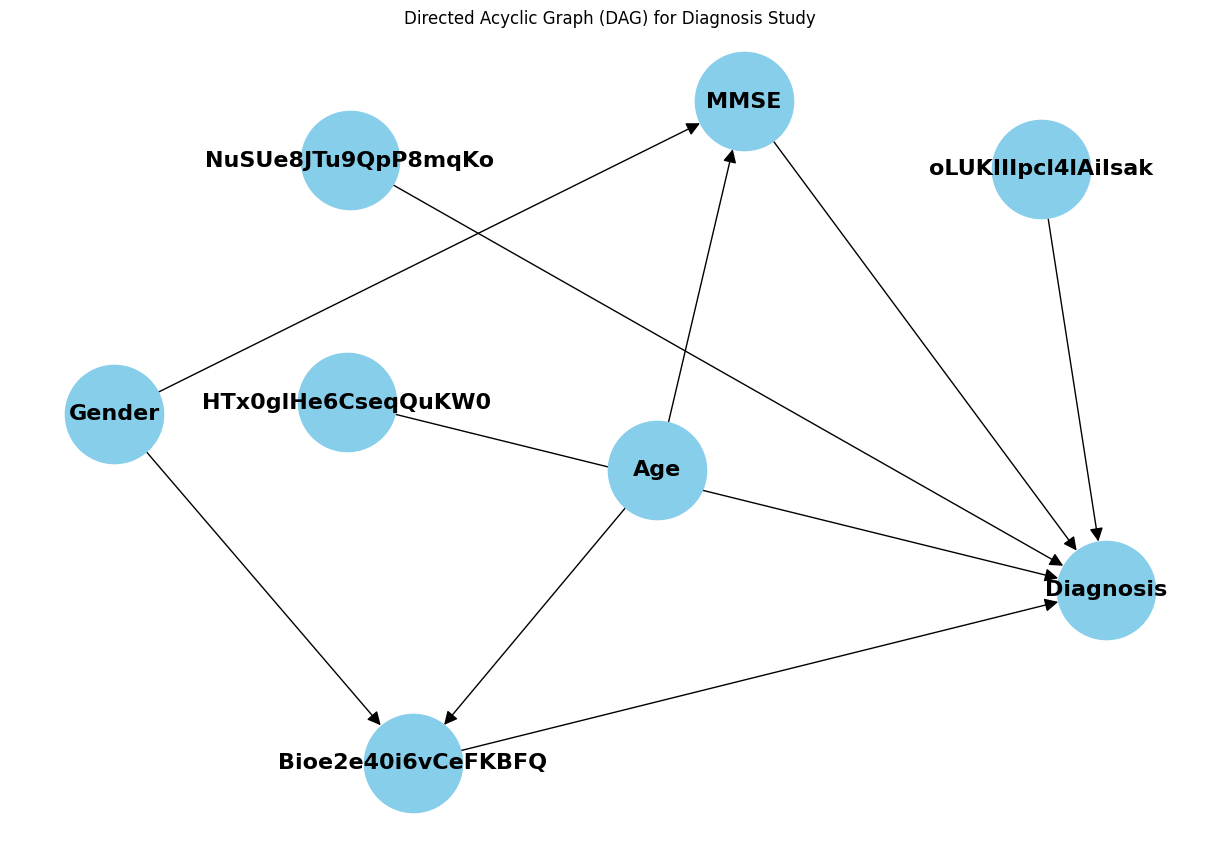

In [38]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define some nodes for the key features based on their correlation strengths
# Direct influence on Diagnosis
direct_influences = ['MMSE', 'Bioe2e40i6vCeFKBFQ', 'HTx0glHe6CseqQuKW0', 'oLUKIIIpcl4lAiIsak', 'NuSUe8JTu9QpP8mqKo']

# Adding edges (assuming direct influences for simplicity here)
for feature in direct_influences:
    G.add_edge(feature, 'Diagnosis')

# Assuming 'Age' and 'Gender' as potential confounders (generic example, replace with actual confounders from domain knowledge)
G.add_edge('Age', 'MMSE')
G.add_edge('Gender', 'MMSE')
G.add_edge('Age', 'Bioe2e40i6vCeFKBFQ')
G.add_edge('Gender', 'Bioe2e40i6vCeFKBFQ')

# Draw the DAG
pos = nx.spring_layout(G, seed=42)  # For consistent layout
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=5000, font_size=16, font_weight='bold', arrowstyle='-|>', arrowsize=20)
plt.title('Directed Acyclic Graph (DAG) for Diagnosis Study')
plt.show()


In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example assuming 'df' is your DataFrame and includes 'Age' and 'Gender'
# Model without confounders
model_without_confounders = smf.ols('Diagnosis ~ MMSE + Bioe2e40i6vCeFKBFQ', data=df).fit()

# Model with potential confounders
model_with_confounders = smf.ols('Diagnosis ~ MMSE + Bioe2e40i6vCeFKBFQ + Age + C(Sex)', data=df).fit()

# Print the summaries to compare
print("Model without confounders:\n", model_without_confounders.summary())
print("Model with confounders:\n", model_with_confounders.summary())


Model without confounders:
                             OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     55.33
Date:                Tue, 07 May 2024   Prob (F-statistic):           2.77e-21
Time:                        22:13:17   Log-Likelihood:                -349.24
No. Observations:                 314   AIC:                             704.5
Df Residuals:                     311   BIC:                             715.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercep

### Counterfactual

In [47]:
import statsmodels.api as sm
import numpy as np

# Assuming df is your DataFrame
X = df[['MMSE', 'Bioe2e40i6vCeFKBFQ', 'HTx0glHe6CseqQuKW0', 'oLUKIIIpcl4lAiIsak', 'NuSUe8JTu9QpP8mqKo', 'Sex' , 'Age']]
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(df['Diagnosis'], X).fit()

# Calculate the counterfactual prediction
# Increase MMSE_y by 1 while holding other variables constant
counterfactual_X = X.copy()
counterfactual_X['MMSE'] += 1

# Predicting the counterfactual scenario
df['counterfactual_prediction'] = model.predict(counterfactual_X)


In [50]:
df

,Age,Sex,MMSE,KAAgkL3gvR34_RUV7I,9kp4KA69O4w7qes13I,fj3VaHdbTqbufvj1KE,Bioe2e40i6vCeFKBFQ,xXp1ae5nin_1Xtf6YI,WddX7Uru50c_dQOwqo,NDrblACpZpRuSXPZ5E,9SPOeeVLxlLNNr4UJI,TV_6KSeKCjnqgJXfeQ,HTx0glHe6CseqQuKW0,36JWb571RKl2v.XB_c,Zeqv30z1576CS_FIDk,r7_NRVfV4A16iv8_eU,WeB6vK5Z755274NyBY,fIlLXtp6lfoae0v_RM,0Xgknpy6fPH7h6F3rU,cIt_mP6VhmdZ.ZxJOs,T_utWKiB4U6F5HftYI,Bx9Eg6K.SSUCVQuWSE,TquC6ANSpC.booLjl4,oop4pqiNEK0ojYhSXg,WF_ziugieiGlHiZxeQ,oLUKIIIpcl4lAiIsak,0pKeK4gjT6L8oPop5I,NuSUe8JTu9QpP8mqKo,KrSBbx7g4uCNeihXqU,cs6LoBn7Cn0Uo1F3js,Diagnosis,intercept,counterfactual_prediction,propensity_score
Subject_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DCR00025,78,0,0.701007,0.562187,0.331808,0.442700,0.166206,0.445339,0.580395,0.231116,0.234750,0.297765,0.269499,0.162133,0.127941,0.163627,0.456659,0.088763,0.339435,0.397023,0.175067,0.691785,0.272891,0.914376,0.500827,0.463428,0.269195,0.706103,0.224217,0.412062,0,1,1.844122,0.627030
DCR00028,76,0,0.701007,0.364965,0.296833,0.293662,0.261484,0.179618,0.000000,0.469731,0.214046,0.252621,0.209381,0.316841,0.213541,0.038635,0.431872,0.220056,0.364742,0.292857,0.182167,0.392981,0.532119,0.823368,0.207573,0.635436,0.250871,0.783603,0.085135,0.530617,0,1,1.734382,0.614051
DCR00031,76,0,0.701007,0.146130,0.125352,0.178385,0.353928,0.430409,0.468388,0.127366,0.130121,0.260083,0.281273,0.264243,0.311468,0.224302,0.204377,0.256418,0.133067,0.156546,0.168092,0.550379,0.426785,0.873960,0.439801,0.789685,0.168997,0.908566,0.255001,0.556696,0,1,1.680102,0.618545
DCR00032,76,1,0.701007,0.309759,0.320664,0.313261,0.440292,0.525652,0.174752,0.200752,0.231378,0.099191,0.284304,0.005277,0.072690,0.287957,0.314132,0.202928,0.175108,0.220304,0.185648,0.443696,0.408014,0.905325,0.165924,0.444634,0.214378,0.793530,0.296840,0.400357,0,1,1.792828,0.621119
DCR00037,76,1,0.701007,0.151492,0.345653,0.153025,0.376373,0.383213,0.339325,0.087939,0.173998,0.354407,0.302053,0.257437,0.043974,0.351660,0.180258,0.421991,0.193924,0.143799,0.319116,0.576612,0.405914,0.822862,0.307349,0.778732,0.294955,0.702799,0.327312,0.447230,0,1,1.702175,0.602628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THSMCI033,77,1,0.833333,0.219104,0.065413,0.150580,0.333030,0.421250,0.301582,0.563591,0.153752,0.344541,0.328997,0.358507,0.262698,0.266028,0.245659,0.179542,0.269702,0.149504,0.338904,0.504517,0.307607,0.880877,0.285851,0.555279,0.364249,0.787017,0.420947,0.509086,2,1,1.917092,0.607222
THSMCI060,77,1,0.666667,0.587870,0.654465,0.626304,0.801285,0.727783,0.582114,0.819877,0.630222,0.703077,0.654344,0.748376,1.000000,0.674011,0.659140,0.769905,0.613856,0.859556,0.630794,0.815683,0.763878,0.357892,0.702414,0.102165,0.769098,0.122849,0.624014,0.685961,2,1,2.262949,0.604592
THSMCI061,77,1,0.777778,0.524451,0.739365,0.682732,0.820718,0.880425,0.711450,0.901352,0.397458,0.926043,1.000000,0.854392,0.483655,0.819029,0.614362,0.847514,0.626171,0.520446,0.758350,0.909860,0.679939,0.489043,0.884783,0.346317,0.607627,0.376494,0.955124,0.867451,2,1,2.262387,0.637599


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Fit a logistic regression model to estimate propensity scores
logit = LogisticRegression()
df['propensity_score'] = logit.fit(df[['MMSE', 'Bioe2e40i6vCeFKBFQ', 'HTx0glHe6CseqQuKW0', 'oLUKIIIpcl4lAiIsak', 'NuSUe8JTu9QpP8mqKo', 'Age']], df['Sex']).predict_proba(df[['MMSE', 'Bioe2e40i6vCeFKBFQ', 'HTx0glHe6CseqQuKW0', 'oLUKIIIpcl4lAiIsak', 'NuSUe8JTu9QpP8mqKo', 'Age']])[:,1]

# Suppose 'treatment' is a binary variable in your dataset
male = df[df['Sex'] == 1]
female = df[df['Sex'] == 0]

# Reset index correctly by assigning back to the variable
male = male.reset_index(drop=True)
female = female.reset_index(drop=True)

# Matching treated units with control units based on propensity score
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(female[['propensity_score']])
distances, indices = nn.kneighbors(male[['propensity_score']])

# Estimate the counterfactual outcome by comparing matched units
# Safely assign the matched outcomes by resetting the index of the selection from female
male['counterfactual_outcome'] = female.iloc[indices.flatten()].reset_index(drop=True)['Diagnosis']


In [63]:
# Example code to compare baseline characteristics
import pandas as pd

# After matching, compare the mean or median of covariates between groups
matched_female = female.iloc[indices.flatten()].reset_index(drop=True)
comparison = pd.DataFrame({
    'Male': male[['MMSE', 'Age']].mean(),
    'Matched Female': matched_female[['MMSE', 'Age']].mean()
})
print("Comparison of baseline characteristics:", comparison)


Comparison of baseline characteristics:            Male  Matched Female
MMSE   0.682040        0.668568
Age   75.112245       75.352041


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Alternative model for propensity score
df['propensity_score_alt'] = LogisticRegression().fit(df[['MMSE', 'Age']], df['Sex']).predict_proba(df[['MMSE', 'Age']])[:, 1]

# Matching with the new propensity score
nn_alt = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(female[['propensity_score']])
_, indices_alt = nn_alt.kneighbors(male[['propensity_score']])
matched_female_alt = female.iloc[indices_alt.flatten()].reset_index(drop=True)

# Compare the new matched groups
comparison_alt = pd.DataFrame({
    'Male': male[['MMSE', 'Age']].mean(),
    'Matched Female (Alt)': matched_female_alt[['MMSE', 'Age']].mean()
})
print("Sensitivity Analysis Comparison:\n", comparison_alt)


Sensitivity Analysis Comparison:
            Male  Matched Female (Alt)
MMSE   0.682040              0.668568
Age   75.112245             75.352041


In [60]:
# Adjust MMSE by a standard deviation
std_dev = male['MMSE'].std()
male['Adjusted MMSE'] = male['MMSE'] + std_dev

# Assuming a model to predict Diagnosis with the adjusted MMSE
# Here, using a simple linear model as an example
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(male[['Adjusted MMSE']], male['Diagnosis'])
predicted_outcomes = model.predict(male[['Adjusted MMSE']])
print("Predicted outcomes with adjusted MMSE:\n", predicted_outcomes)


Predicted outcomes with adjusted MMSE:
 [ 0.78309051  0.78309051  1.22429499  0.24053899  0.07657966  0.40449833
  0.89637633  0.15855933  0.81439666  0.48647799 -0.00540001  1.06033566
  0.89637633  0.73241699 -0.25133901 -0.08737967  0.32251866  0.89637633
  0.48647799 -0.00540001  0.48647799  0.40449833  0.56845766  0.81439666
  0.48647799  0.48647799  0.97835599  1.06033566  0.97835599  1.14231533
  1.14231533  1.22429499  1.14231533  1.22429499  0.97835599  0.97835599
  1.22429499  0.97835599  0.97835599  1.14231533  0.81439666  1.06033566
  0.81439666  0.97835599  1.22429499  1.14231533  1.06033566  1.22429499
  0.81439666  0.73241699  1.06033566  0.89637633  0.89637633  0.89637633
  0.89637633  1.06033566  1.06033566  1.14231533  0.65043733  0.56845766
 -0.08737967  0.48647799  0.97835599 -0.16935934  0.65043733 -0.00540001
  0.73241699  0.73241699  0.73241699  0.32251866  0.97835599 -0.08737967
 -0.16935934  0.48647799  1.14231533  1.14231533  1.22429499  1.22429499
  1.1423153

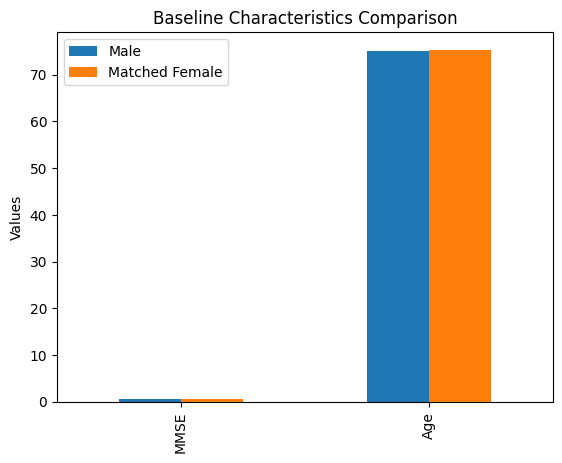

In [61]:
import matplotlib.pyplot as plt

# Example visualization of baseline characteristics
comparison.plot(kind='bar')
plt.title('Baseline Characteristics Comparison')
plt.ylabel('Values')
plt.show()
